In this article, we derive the price of an American binary (a.k.a. digital) call and put options assuming that the underlying asset follows geometric Brownian motion. We handle the case in which a finite expiry time is specified for the option. We obtain results for the corresponding perpetual (i.e., no expiry) options by taking limits.

## American binary option

A binary option is a type of option in which pays off either some fixed amount (e.g., one dollar) or nothing at all.

An American binary put pays the holder exactly one dollar if the asset on which it is written drops below a specific valuation, called the strike. For example, consider owning an American binary put with a strike price of 100 dollars, expiring in a year, and written on AAPL stock (which, for the purposes of this example, we assume trades at some value of greater than 100 dollars today). If at any point in time between now and a year from now AAPL stock drops below 100 dollars, we will receive one dollar by exercising the option.

An American binary call is similar, except that it pays the holder exactly one dollar if the asset on which it is written goes above a specific valuation.

## Mathematical formulation

We assume that, under the [pricing measure](https://en.wikipedia.org/wiki/Risk-neutral_measure), the price of the stock (e.g., APPL) at time $t$ is given by 
\begin{equation}
    S_t = x \exp\biggl( \left(r - \delta - \frac{1}{2} \sigma^2 \right) t + \sigma W_t \biggr)
\end{equation}
where the initial price $x$ and volatility $\sigma$ are positive, the interest rate $r$ is real, and the dividend rate $\delta$ is nonnegative.
$W$ is a standard [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).

Let $K$ denote the (nonnegative) strike price.
If $x \leq K$, the American binary put should be exercised immediately and is thus worth exactly one dollar.
We call this the *trivial case*.
Analogously, if $x \geq K$, the American binary call is worth one dollar.
Therefore, we proceed assuming the nontrivial case (i.e., $x > K$ for puts and $x < K$ for calls).

Let $\tau$ be the first time the asset hits level $K$.
It follows that, for each realization, $\tau$ is either infinite or satisfies
\begin{equation}
    \log s + \left( r - \delta - \frac{1}{2} \sigma^2 \right) \tau + \sigma W_\tau = \log K.
\end{equation}
We can rewrite the above equation as $\mu \tau + W_\tau = a$ where
\begin{equation}
    \mu = \frac{r - \delta - \frac{1}{2} \sigma^2}{\sigma}
    \quad \text{and} \quad
    a = \frac{\log s - \log K}{\sigma}.
\end{equation}
In other words, $\tau$ is the first time a Wiener process with drift $\mu$ hits the level $a$.

The [density of the first time a Wiener process with drift $\mu$ hits the level $a$](https://math.stackexchange.com/questions/1053294/density-of-first-hitting-time-of-brownian-motion-with-drift) is well-known:
\begin{equation}
    f(t) = \frac{\left| a \right|}{\sqrt{2 \pi t^3}} \exp \biggl( -\frac{\left( a - \mu t \right)^2}{2t} \biggr).
\end{equation}
Let $T \leq \infty$ be the expiry time of the option.
The fair price of either instrument (in the nontrivial case) is
\begin{equation}
    \mathbb{E} e^{-r \tau} \chi_{[0, T]}(\tau)
    = \int_0^T e^{-r t} f(t) dt.
\end{equation}
where $\chi_A$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function) on a set $A$.
The notation above reveals that this is none other than the [Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform) of $f \cdot \chi_{[0, T]}$ evaluated at $r$.

**Lemma.**
$\mu^2 + 2r$ is nonnegative.

*Proof*.
If $r$ is nonnegative, the result is trivial.
If $r$ is negative, then since $\delta \geq 0$,
\begin{equation}
    \left( \mu^2 + 2r \right) \sigma^2
    \geq \left(r - \frac{1}{2} \sigma^2 \right)^2 + 2r \sigma^2
    = r^2 + r \sigma^2 + \frac{1}{4} \sigma^4
    = \left(r + \frac{1}{2} \sigma^2 \right)^2
    \geq 0.
\end{equation}

## Laplace transform

In this section, we give an expression for the Laplace transform.
We do not assume particular forms for $a$ and $\mu$.
Below, we use $\operatorname{erf}(\cdot)$ and $\operatorname{sgn}(\cdot)$ to denote the [error](https://en.wikipedia.org/wiki/Error_function) and [signum](https://en.wikipedia.org/wiki/Sign_function) functions, respectively.

**Theorem.**
Let $b = \sqrt{\mu^2 + 2r}$ and $0 < T < \infty$.
If $b$ is real, then
\begin{equation}
    \mathbb{E} e^{-r \tau} \chi_{[0, T]}(\tau)
    = \frac{1}{2} e^{a (\mu - b)} \left(
        1
        + \operatorname{sgn}(a) \operatorname{erf}\biggl(\frac{bT - a}{\sqrt{2T}}\biggr)
        + e^{2ab} \left(
            1
            - \operatorname{sgn}(a) \operatorname{erf}\biggl(\frac{bT + a}{\sqrt{2T}}\biggr)
        \right)
    \right)
\end{equation}

*Proof*.
Denote by $F(T)$ the expression on the right-hand side of the above equation.
Noting that
\begin{equation}
    \lim_{T \downarrow 0} \operatorname{erf} \biggl( \frac{bT \pm a}{\sqrt{2T}} \biggr)
    = \pm \operatorname{sgn}(a),
\end{equation}
it follows that $\lim_{T \downarrow 0} F(T) = 0$.
If we can establish $F^\prime(t) = e^{-r t} f(t)$ for all $0 < t < \infty$, then by the [fundamental theorem of calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus),
\begin{equation}
    F(T) = F(T) - \lim_{T \downarrow 0} F(T) = \int_0^T e^{-r t} f(t) dt,
\end{equation}
as desired.
This is accomplished with SageMath below:

In [6]:
var("t a r μ")
assume(t > 0)
assume(a, "real")
assume(r, "real")
assume(μ, "real")
b = sqrt(μ^2 + 2 * r)
F = 1/2 * exp(a * (μ - b)) * (
    1 + sign(a) * erf((b * t - a) / sqrt(2 * t)) + exp(2 * a * b) * (
        1 - sign(a) * erf((b * t + a) / sqrt(2 * t))))
f = sign(a) * a / sqrt(2 * pi * t^3) * exp(- (a - μ * t)^2 / (2 * t))
delta = diff(F, t) - exp(-r * t) * f
assert delta.canonicalize_radical() == 0

The infinite horizon case ($T = \infty$) follows by taking the limit $T \rightarrow \infty$ and applying the [dominated convergence theorem](https://en.wikipedia.org/wiki/Dominated_convergence_theorem) to the above:

**Corollary.**
Let $b = \sqrt{\mu^2 + 2r}$.
If $b$ is real, then $\mathbb{E} e^{-r \tau} = e^{a \mu - |a| b}$.

## Implementation

In [17]:
from scipy.special import erf
import numpy as np


def american_binary(asset_price,
                    dividend_rate,
                    expiry_time,
                    risk_free_rate,
                    strike,
                    volatility):
    """Computes the value of an American binary option.
    
    Parameters
    ----------
    asset_price: The price of the asset at the initial time (x).
    dividend_rate: The dividend rate (δ).
    expiry_time: The option's time-to-expiry (T).
    risk_free_rate: The risk-free rate of return (r).
    strike: The strike price (K).
    volatility: The volatility (σ).
    
    Returns
    -------
    The value of an American binary put if the asset price is greater than the strike.
    The value of an American binary call otherwise.
    """
    r = risk_free_rate
    T = expiry_time
    a = np.log(asset_price / strike) / volatility
    μ = (r - dividend_rate - 0.5 * volatility**2) / volatility
    b = np.sqrt(μ**2 + 2. * r)
    return 0.5 * np.exp(a * (μ - b)) * (
        1 + np.sign(a) * erf((b * T - a) / np.sqrt(2. * T)) + np.exp(2. * a * b) * (
            1 - np.sign(a) * erf((b * T + a) / np.sqrt(2. * T))))

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
K = 100.
r = 0.04
δ = 0.01
σ = 0.2
T = 1.

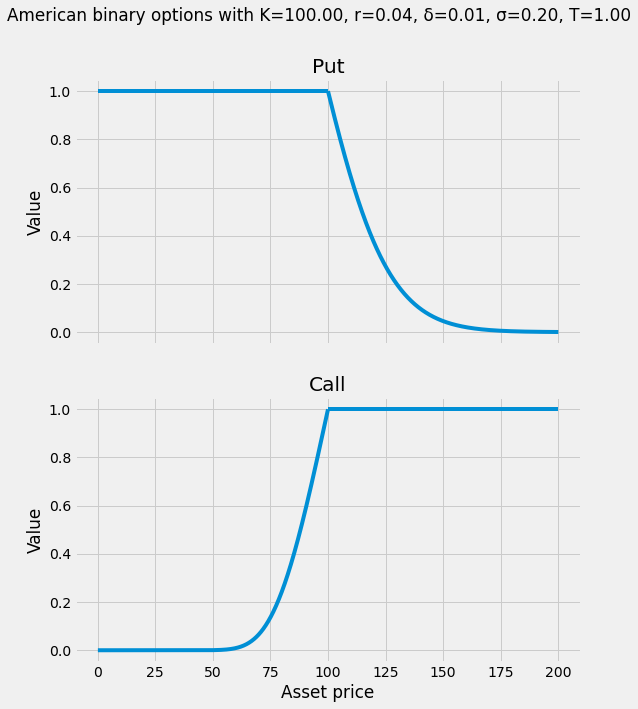

In [27]:
matplotlib.style.use('fivethirtyeight')

x = np.linspace(K, 2. * K, 1001)
y = american_binary(x, δ, T, r, K, σ)

fig, (ax1, ax2) = plt.subplots(figsize=(1.618*5., 2.*5.), nrows=2, ncols=1, sharex=True, sharey=True)
ax1.hlines(1., 0., K)
ax1.plot(x, y)
ax1.set_ylabel("Value")
ax1.set_title("Put")

x = np.linspace(0, K, 1001)[1:]
y = american_binary(x, δ, T, r, K, σ)

ax2.hlines(1., K, 2.* K)
ax2.plot(x, y)
ax2.set_title("Call")
ax2.set_ylabel("Value")
ax2.set_xlabel("Asset price")

fig.suptitle(f"American binary options with K={K:.2f}, r={r:.2f}, δ={δ:.2f}, σ={σ:.2f}, T={T:.2f}");